# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 571


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [16]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q={city}"
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | tiksi
Processing Record 2 of Set 1 | atafu village
Processing Record 3 of Set 1 | al kharijah
Processing Record 4 of Set 1 | merritt island
Processing Record 5 of Set 1 | ambovombe
Processing Record 6 of Set 1 | sarangani
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | berezovo
Processing Record 10 of Set 1 | petawawa
Processing Record 11 of Set 1 | ghanzi
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | bethel
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | west island
Processing Record 17 of Set 1 | hawaiian paradise park
Processing Record 18 of Set 1 | punta arenas
Processing Record 19 of Set 1 | port-aux-francais
Processing Record 20 of Set 1 | kerikeri
Processing Record 21 of Set 1 | badger
Processing Record 22 of Set 1 | 

In [17]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          545
Lat           545
Lng           545
Max Temp      545
Humidity      545
Cloudiness    545
Wind Speed    545
Country       545
Date          545
dtype: int64

In [18]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,tiksi,71.6872,128.8694,-22.50,100,39,2.24,RU,1714327182
1,atafu village,-8.5421,-172.5159,29.94,75,88,6.71,TK,1714327148
2,al kharijah,25.4514,30.5464,25.38,14,1,4.37,EG,1714327182
3,merritt island,28.5392,-80.6720,28.34,52,40,7.72,US,1714327182
4,ambovombe,-25.1667,46.0833,21.23,79,49,7.98,MG,1714327182


In [19]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [20]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-22.50,100,39,2.24,RU,1714327182
1,atafu village,-8.5421,-172.5159,29.94,75,88,6.71,TK,1714327148
2,al kharijah,25.4514,30.5464,25.38,14,1,4.37,EG,1714327182
3,merritt island,28.5392,-80.6720,28.34,52,40,7.72,US,1714327182
4,ambovombe,-25.1667,46.0833,21.23,79,49,7.98,MG,1714327182


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

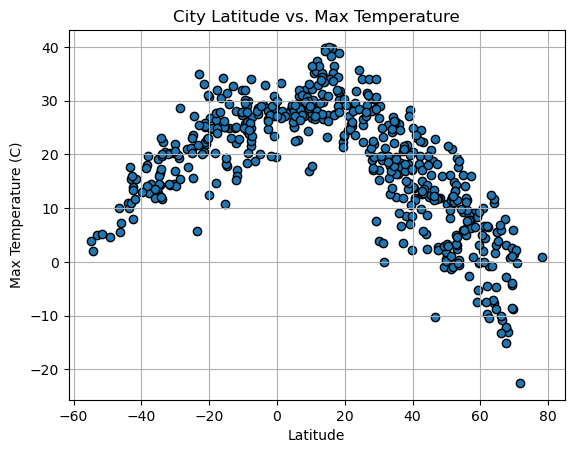

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

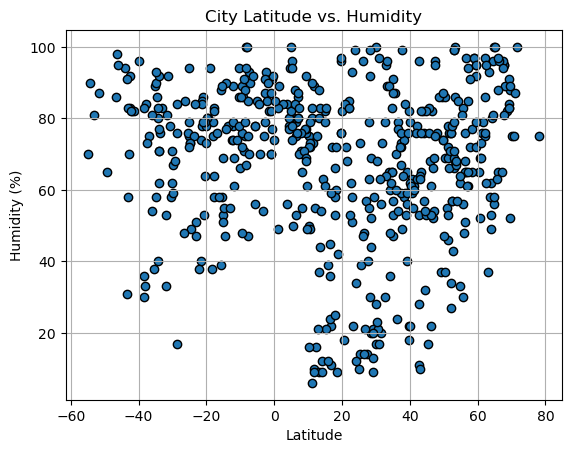

In [33]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

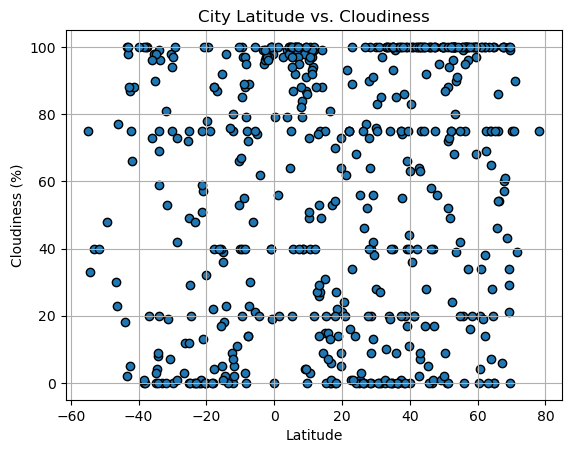

In [35]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

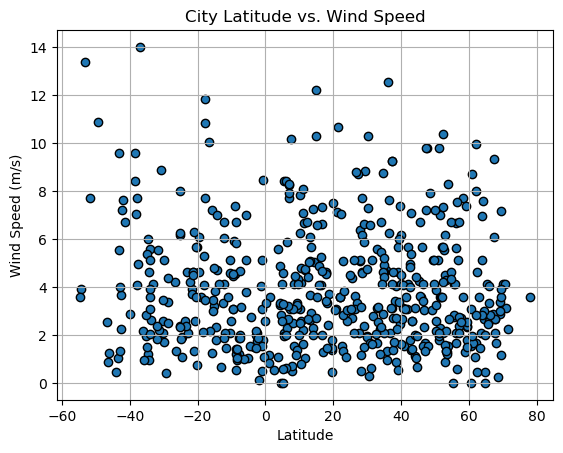

In [37]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors="black")

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [78]:
# Define a function to create Linear Regression plots
def plot_line(x_val, y_val, x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_val, y_val)
    regress_values = x_val * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_val, y_val)
    plt.plot(x_val,regress_values,"r-")
    plt.xlabel("Latitude")
    plt.ylabel("Max Temp")
    plt.annotate(line_eq,xy=(x,y),fontsize=15,color="red")
    print(f"The r-value is: {rvalue**2}")
    plt.show()


In [79]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,tiksi,71.6872,128.8694,-22.50,100,39,2.24,RU,1714327182
2,al kharijah,25.4514,30.5464,25.38,14,1,4.37,EG,1714327182
3,merritt island,28.5392,-80.6720,28.34,52,40,7.72,US,1714327182
5,sarangani,5.4033,125.4636,28.83,79,87,8.41,PH,1714327183
7,enewetak,11.3474,162.3373,27.12,73,94,6.67,MH,1714327183


In [80]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,atafu village,-8.5421,-172.5159,29.94,75,88,6.71,TK,1714327148
4,ambovombe,-25.1667,46.0833,21.23,79,49,7.98,MG,1714327182
6,puerto ayora,-0.7393,-90.3518,28.98,91,19,1.79,EC,1714327183
10,ghanzi,-21.5667,21.7833,20.44,40,0,3.93,BW,1714327183
13,bredasdorp,-34.5322,20.0403,16.53,86,4,1.21,ZA,1714327183


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: 0.7230758808410385


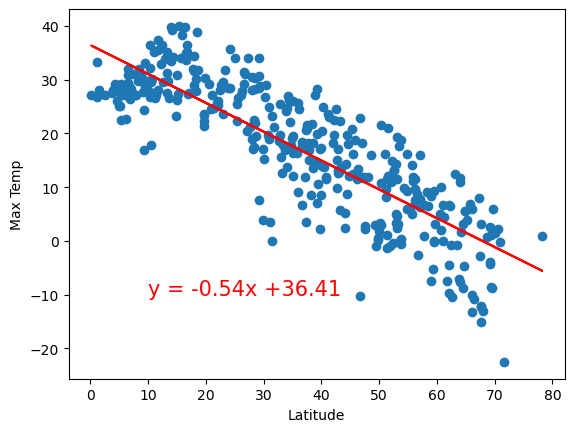

In [81]:
# Linear regression on Northern Hemisphere
plot_line(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], 10, -10)

The r-value is: 0.5719052540357241


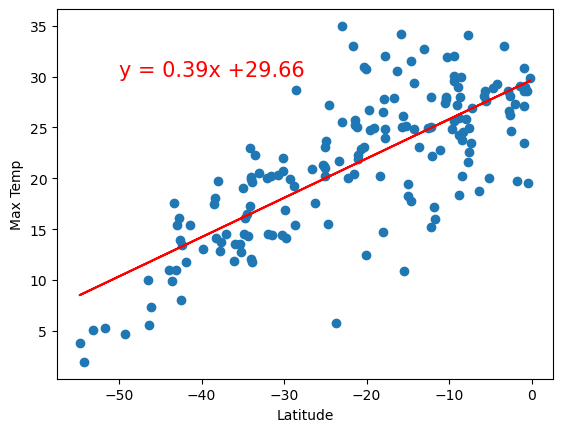

In [82]:
# Linear regression on Southern Hemisphere
plot_line(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], -50, 30)

**Discussion about the linear relationship:** It correlates! <3 James


### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.031405682555750485


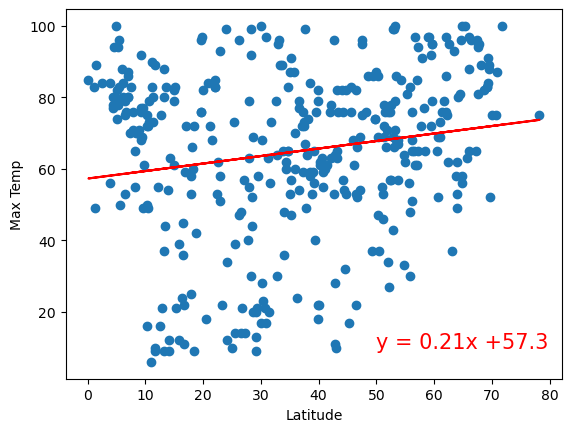

In [84]:
# Northern Hemisphere
plot_line(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], 50, 10)

The r-value is: 0.01145311996033122


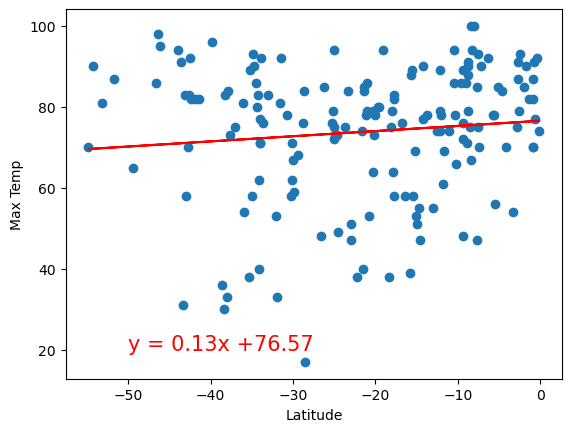

In [86]:
# Southern Hemisphere
plot_line(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], -50, 20)

**Discussion about the linear relationship:** It doesn't correlate <3 James

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.0019976663983501943


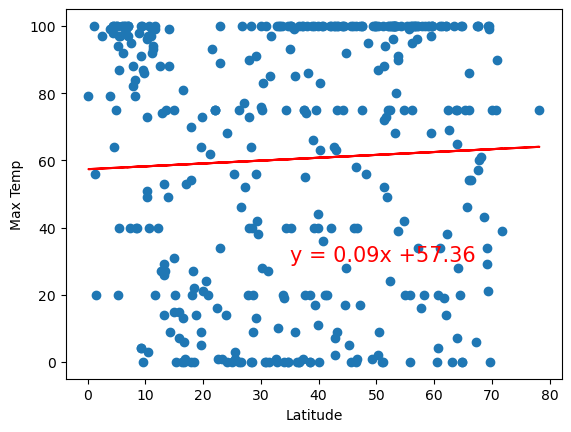

In [89]:
# Northern Hemisphere
plot_line(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], 35, 30)

The r-value is: 0.00738045723585136


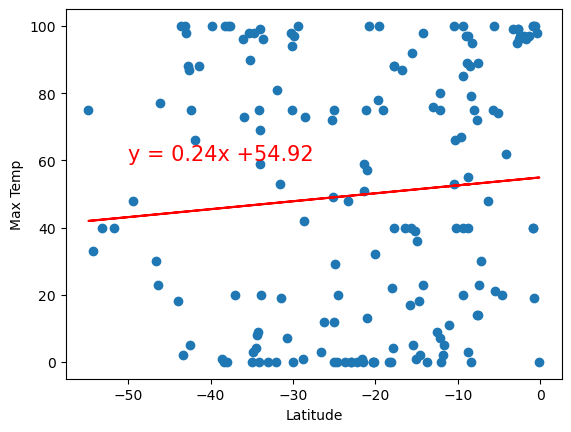

In [91]:
# Southern Hemisphere
plot_line(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], -50, 60)

**Discussion about the linear relationship:** It doesn't correlate <3 James

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.0026688738726184506


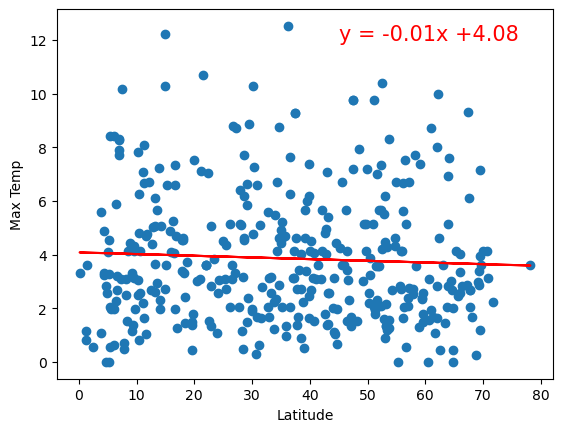

In [93]:
# Northern Hemisphere
plot_line(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], 45, 12)

The r-value is: 0.06190850104945468


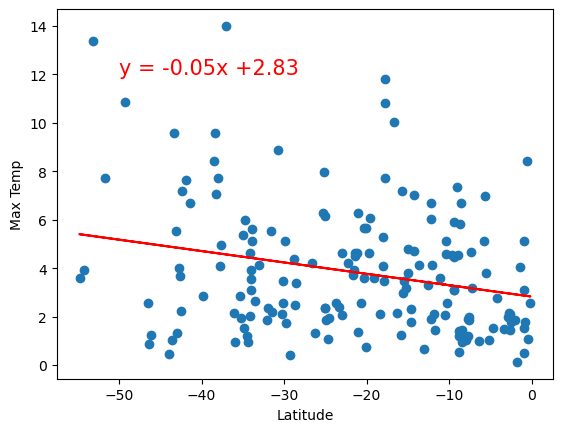

In [94]:
# Southern Hemisphere
plot_line(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], -50, 12)

**Discussion about the linear relationship:** It barely correlates <3 James